In [1]:
import sympy as sym
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S, I, R = sym.Function("S"), sym.Function("I"), sym.Function("V")
N, mu, alpha, beta, t = sym.symbols("N, mu, alpha, beta, t")

In [3]:
eq1 = sym.Derivative(S(t), t) - (- alpha * S(t) * I(t) - mu * R(t))
eq2 = sym.Derivative(I(t), t) - (alpha * I(t) * S(t) / N - beta * I(t))
eq3 = sym.Derivative(R(t), t) - (beta * I(t) + mu * R(t))

In [4]:
sym.dsolve((eq1, eq2, eq3))

NotImplementedError: 

Mae ymchwil pellach yn dangos bod datrysiad union i'r system o hafaliadau differol hon yn anodd. Gadewch i ni ei wneud yn rhifiadol:

In [5]:
def dx(x, t, alpha, beta, mu):

    return (- alpha * x[1] * x[0] - mu * x[0],
            alpha * x[1] * x[0]  - beta * x[1],
            beta * x[1] + mu * x[0])

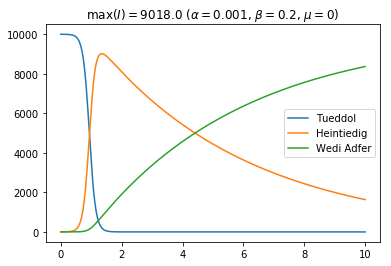

In [6]:
alpha = 1 / 1000  # Mae pob 1000 rhyngweithrediadu yn arwain at haint
beta = 1 / 5  # Mae'n cymryd 5 uned amser i adfer o'r afiechyd
N = 10 ** 4  # Poblogaeth o 10 mil o bobl
mu = 0  # 0 canran brechu

ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(alpha, beta, mu))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Tueddol")
plt.plot(ts, I, label="Heintiedig")
plt.plot(ts, R, label="Wedi Adfer")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($\\alpha={alpha}$, $\\beta={beta}$, $\mu={mu}$)")
plt.savefig("base_scenario.pdf");

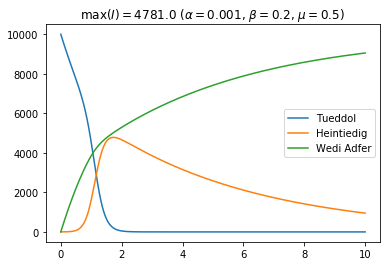

In [7]:
mu = 1 / 2  # Brechu hanner y poblogaeth
ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(alpha, beta, mu))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Tueddol")
plt.plot(ts, I, label="Heintiedig")
plt.plot(ts, R, label="Wedi Adfer")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($\\alpha={alpha}$, $\\beta={beta}$, $\mu={mu}$)")
plt.savefig("moderate_vaccination_rate.pdf");

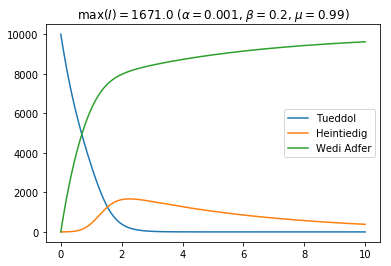

In [8]:
mu = 99 / 100  # Brechu 99% o'r poblogaeth
ts = np.linspace(0, 10, 5000)
xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(alpha, beta, mu))
S, I, R = xs.T
plt.figure()
plt.plot(ts, S, label="Tueddol")
plt.plot(ts, I, label="Heintiedig")
plt.plot(ts, R, label="Wedi Adfer")
plt.legend()
plt.title(f"$\max(I)={round(max(I))}$ ($\\alpha={alpha}$, $\\beta={beta}$, $\mu={mu}$)")
plt.savefig("high_vaccination_rate.pdf");

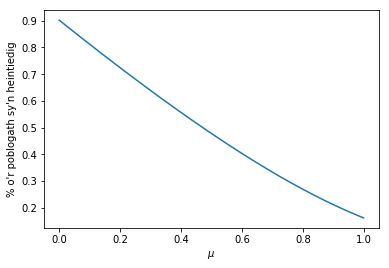

In [9]:
vaccination_rates = np.linspace(0, 1, 500)
max_percent_of_infected = []
for mu in vaccination_rates:
    xs = integrate.odeint(func=dx, y0=np.array([N - 1, 1, 0]), t=ts, args=(alpha, beta, mu))
    S, I, R = xs.T
    max_percent_of_infected.append(max(I) / N)
plt.figure()
plt.plot(vaccination_rates, max_percent_of_infected)
plt.xlabel("$\mu$")
plt.ylabel("% o'r poblogath sy'n heintiedig")
plt.savefig("effect_of_vaccination_rate.pdf");